In [1]:
import pandas as pd
import numpy as np
import random

# Set random seed for reproducibility
np.random.seed(42)

# Parameters for dataset generation
num_students = 1000  # Number of students to simulate

# Generate Student IDs
student_ids = [f"S{str(i).zfill(4)}" for i in range(1, num_students + 1)]

# Generate Student Demographics
ages = np.random.randint(15, 22, size=num_students)  # Age between 15 and 21
genders = np.random.choice(['Male', 'Female'], size=num_students, p=[0.5, 0.5])
socioeconomic_statuses = np.random.choice(['Low', 'Middle', 'High'], size=num_students, p=[0.3, 0.5, 0.2])

# Generate Academic Performance Data
grades = np.random.uniform(50, 100, size=num_students)  # Grades between 50 and 100
attendance = np.random.uniform(60, 100, size=num_students)  # Attendance percentage between 60% and 100%

# Generate Learning Activities Data
time_spent_on_homework = np.random.uniform(0.5, 4, size=num_students)  # Time spent on homework in hours
class_participation = np.random.choice(['Low', 'Medium', 'High'], size=num_students, p=[0.2, 0.5, 0.3])

# Generate Academic Performance Status (Pass/Fail)
academic_performance_status = ['Pass' if grade >= 60 else 'Fail' for grade in grades]

# Create DataFrame
data = pd.DataFrame({
    'StudentID': student_ids,
    'Age': ages,
    'Gender': genders,
    'SocioeconomicStatus': socioeconomic_statuses,
    'Grades': grades,
    'Attendance': attendance,
    'TimeSpentOnHomework': time_spent_on_homework,
    'ClassParticipation': class_participation,
    'AcademicPerformanceStatus': academic_performance_status
})

# Save to CSV
data.to_csv('student_performance_data.csv', index=False)

print("Dataset saved as 'student_performance_data.csv'.")

Dataset saved as 'student_performance_data.csv'.


## Read & Explore the Dataset

Now, load and check the dataset:

In [2]:
# Load dataset
df = pd.read_csv('student_performance_data.csv')

# View first few rows
print(df.head())

# Get dataset info
print(df.info())

# Check missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

  StudentID  Age  Gender SocioeconomicStatus     Grades  Attendance  \
0     S0001   21  Female                High  73.821849   99.578045   
1     S0002   18  Female                 Low  61.301450   95.580772   
2     S0003   19  Female                 Low  82.023802   74.858691   
3     S0004   21    Male                 Low  98.949056   67.806661   
4     S0005   17  Female              Middle  80.174655   79.575701   

   TimeSpentOnHomework ClassParticipation AcademicPerformanceStatus  
0             3.153141             Medium                      Pass  
1             3.160019             Medium                      Pass  
2             1.594093                Low                      Pass  
3             1.937389             Medium                      Pass  
4             1.233916               High                      Pass  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                     Non-Null Count  

## Descriptive Statistics

We’ll calculate mean, median, standard deviation for numerical features.

In [3]:
# Mean, Median, Standard Deviation
print(df[['Age', 'Grades', 'Attendance', 'TimeSpentOnHomework']].describe())

             Age       Grades   Attendance  TimeSpentOnHomework
count  1000.0000  1000.000000  1000.000000          1000.000000
mean     17.9600    74.892793    79.448395             2.245859
std       2.0036    14.428974    11.417765             1.009563
min      15.0000    50.000582    60.001229             0.500795
25%      16.0000    62.442623    69.451976             1.400813
50%      18.0000    75.155411    79.329503             2.191778
75%      20.0000    87.201111    89.137688             3.131317
max      21.0000    99.944631    99.982308             3.995775


## Correlation Analysis

Now, let’s check how grades, attendance, and homework time are related.

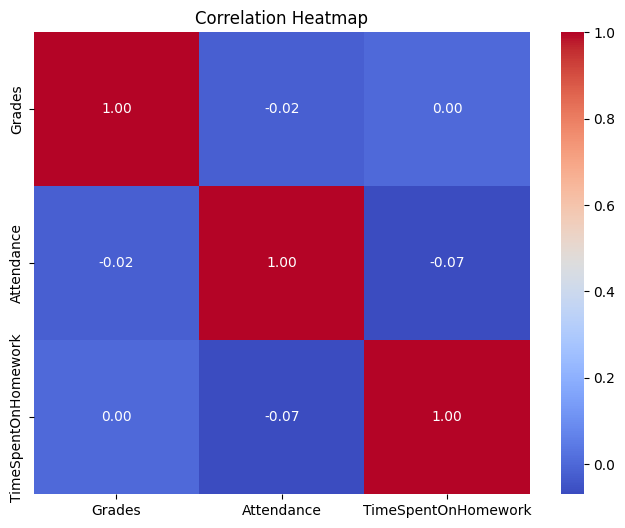

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df[['Grades', 'Attendance', 'TimeSpentOnHomework']].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Visualizing Trends

1. Grades Distribution

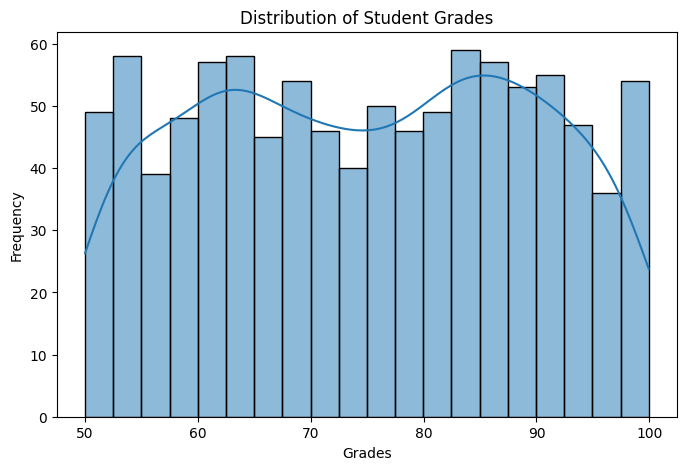

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df['Grades'], bins=20, kde=True)
plt.title("Distribution of Student Grades")
plt.xlabel("Grades")
plt.ylabel("Frequency")
plt.show()

## Attendance vs. Grades

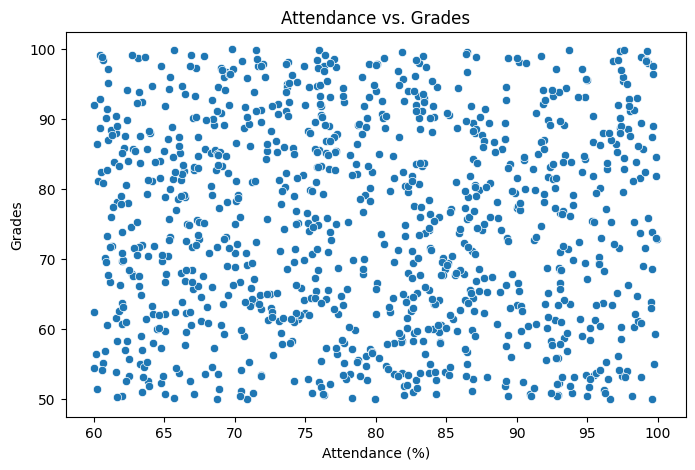

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Attendance'], y=df['Grades'])
plt.title("Attendance vs. Grades")
plt.xlabel("Attendance (%)")
plt.ylabel("Grades")
plt.show()

## Homework Time vs. Grades

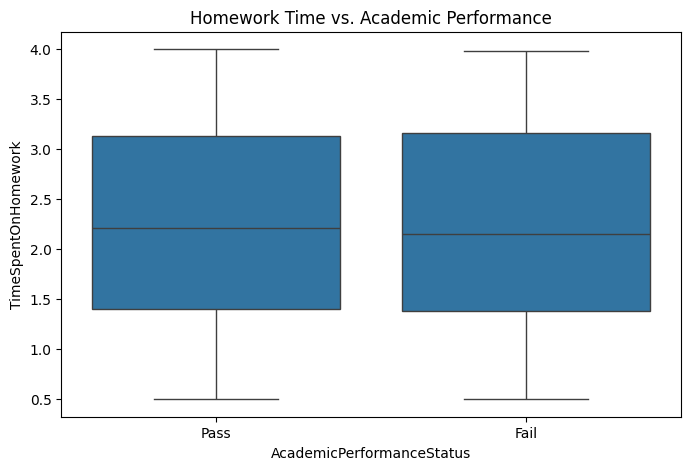

In [7]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['AcademicPerformanceStatus'], y=df['TimeSpentOnHomework'])
plt.title("Homework Time vs. Academic Performance")
plt.show()

## Data Preprocessing

First, we need to convert categorical values into numbers for machine learning.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['SocioeconomicStatus'] = encoder.fit_transform(df['SocioeconomicStatus'])
df['ClassParticipation'] = encoder.fit_transform(df['ClassParticipation'])
df['AcademicPerformanceStatus'] = df['AcademicPerformanceStatus'].map({'Pass': 1, 'Fail': 0})

# Select features & target variable
X = df[['Attendance', 'Grades', 'TimeSpentOnHomework']]
y = df['AcademicPerformanceStatus']

# Split into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data Preprocessing Done! ✅")

Data Preprocessing Done! ✅


## Train a Logistic Regression Model

Now, let’s train a model to predict Pass/Fail.

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00       159

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



## Visualizing Model Performance

Let’s plot the confusion matrix to see how well the model predicts.

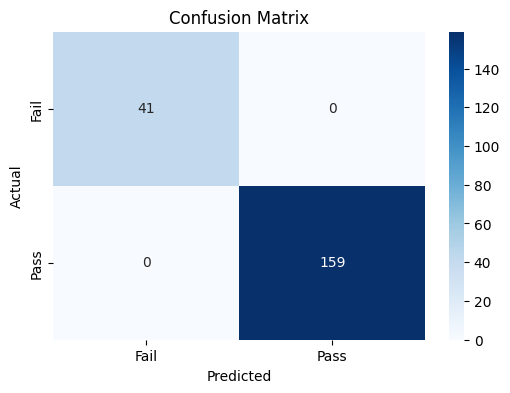

In [10]:
import seaborn as sns

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail", "Pass"], yticklabels=["Fail", "Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()